# Tarea 6. Distribución óptima de capital y selección de portafolios.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en el módulo 3. Específicamente, utilizarás técnicas de optimización media-varianza para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea6_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea6_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [1]:
# Importamos pandas y numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 
                                        'Real', 'Libre_riesgo'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620, 0.0300])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680, 0.0])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real,Libre_riesgo
Media,0.04,0.106,0.083,0.119,0.128,0.062,0.03
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068,0.0


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:-1], index=annual_ret_summ.columns[:-1])
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

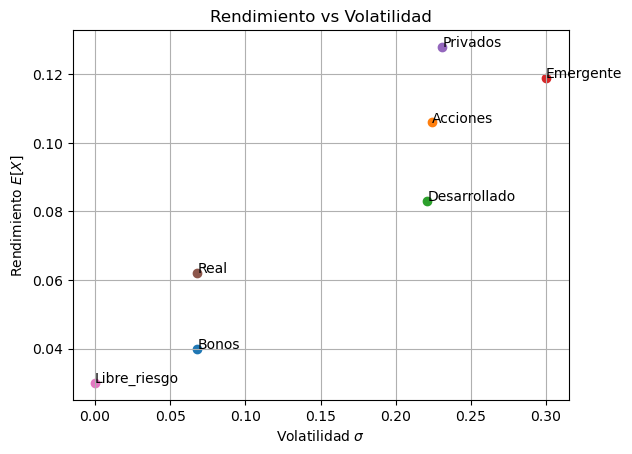

In [4]:
activos = annual_ret_summ.keys()
for i in activos:
    plt.scatter(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'])
    plt.text(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'], i)

plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio 
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio 


In [5]:
annual_ret_summ2 = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 
                                        'Real'], index=['Media', 'Volatilidad'])
annual_ret_summ2.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620])
annual_ret_summ2.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680])

annual_ret_summ2.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Media,0.04,0.106,0.083,0.119,0.128,0.062
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068


In [6]:
S = np.diag(annual_ret_summ2.loc['Volatilidad']).astype(float)
S

array([[0.068, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.224, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.221, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.3  , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.231, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.068]])

In [7]:
sigma = S.dot(corr).dot(S)
sigma

array([[0.004624 , 0.0060928, 0.003757 , 0.00408  , 0.0023562, 0.0009248],
       [0.0060928, 0.050176 , 0.0346528, 0.04032  , 0.0362208, 0.0030464],
       [0.003757 , 0.0346528, 0.048841 , 0.049725 , 0.0306306, 0.0015028],
       [0.00408  , 0.04032  , 0.049725 , 0.09     , 0.017325 , 0.00306  ],
       [0.0023562, 0.0362208, 0.0306306, 0.017325 , 0.053361 , 0.0047124],
       [0.0009248, 0.0030464, 0.0015028, 0.00306  , 0.0047124, 0.004624 ]])

In [8]:
e1 = annual_ret_summ['Bonos'].loc['Media']
e2 = annual_ret_summ['Acciones'].loc['Media']
e3 = annual_ret_summ['Desarrollado'].loc['Media']
e4 = annual_ret_summ['Emergente'].loc['Media']
e5 = annual_ret_summ['Privados'].loc['Media']
e6 = annual_ret_summ['Real'].loc['Media']

eind = np.array([e1, e2, e3, e4, e5, e6])

In [9]:
from scipy.optimize import minimize

# Lo que quiero minimizar
def varianza(w, sigma):
    return w.T.dot(sigma).dot(w)

# Restricciones, quiero un rendimiento iguial a mu_req 
def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req

# Pesos tiene que sumar 1 
def weights_equal_1(w):
    return np.sum(w) - 1


cons = (
    # Rendimiento requerido
    {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, 0.15)},
    # Los pesos tienne que ser 1
    {'type': 'eq', 'fun': weights_equal_1}
)
# Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
min_var = minimize(fun=varianza,
                   x0=np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]),
                   args=(sigma,),
                   bounds=((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                   constraints=cons)


In [10]:
# DataFrame de portafolios de la frontera
N = 100
portafolios = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'media', 'vol'])

In [11]:
ereq = np.linspace(eind.min(), eind.max(), N)

# Para cada rendimiento entre el mínimo y máximo posible ... ¿cuáles son los pesoso con mínima varianza?
for i in range(len(ereq)):
    # Restricciones
    cons = (
        # Rendimiento requerido
        {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, ereq[i])},
        # Los pesos tienne que ser 1
        {'type': 'eq', 'fun': weights_equal_1}
    )
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = minimize(fun=varianza,
                       x0=np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]),
                       args=(sigma,),
                       bounds=((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                       constraints=cons
                      )
    # Pesos, rendimientos y volatilidades de los portafolio
    portafolios.loc[i, ['w1','w2','w3', 'w4','w5', 'w6']] = min_var.x
    portafolios['media'][i] = eind.dot(min_var.x)
    portafolios['vol'][i] = np.sqrt(varianza(min_var.x, sigma))

In [12]:
portafolios['sharpe']=(portafolios.media - 0.03)/portafolios.vol
portafolios

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.04,0.068,0.147059
1,0.959596,0.0,0.0,0.0,0.0,0.040404,0.040889,0.065857,0.165341
2,0.919192,0.0,0.0,0.0,0.0,0.080808,0.041778,0.063832,0.184514
3,0.878788,0.0,0.0,0.0,0.0,0.121212,0.042667,0.061935,0.204516
4,0.838384,0.0,0.0,0.0,0.0,0.161616,0.043556,0.060179,0.225253
...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.278406,0.705686,0.015908,0.124444,0.201224,0.46935
96,0.0,0.0,0.0,0.282137,0.715933,0.001931,0.125333,0.203789,0.467803
97,0.0,0.0,0.0,0.197531,0.802469,0.0,0.126222,0.208246,0.462061
98,0.0,0.0,0.0,0.098765,0.901235,0.0,0.127111,0.217493,0.446502


In [13]:
min_var = portafolios[portafolios.vol == portafolios.vol.min()]
min_var

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
13,0.480905,0.0,0.006451,0.0,0.0,0.512644,0.051556,0.052686,0.409129


In [14]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': weights_equal_1},)
min_var3 = minimize(varianza, 
                    x0=np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]),
                    args=(sigma,),
                    bounds=((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                    constraints=cons)
min_var3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.0027745037321007093
       x: [ 4.951e-01  3.036e-18  2.098e-04  8.674e-19  0.000e+00
            5.046e-01]
     nit: 8
     jac: [ 5.514e-03  9.123e-03  5.258e-03  7.150e-03  7.102e-03
            5.583e-03]
    nfev: 56
    njev: 8

In [15]:
w_minvar3 = min_var3.x
e_minvar3 = eind.dot(w_minvar3)
s_minvar3 = np.sqrt(varianza(w_minvar3, sigma))
sr_minvar3 = (e_minvar3-0.03)/s_minvar3

w_minvar3, e_minvar3, s_minvar3, sr_minvar3

(array([4.95146499e-01, 3.03576608e-18, 2.09838959e-04, 8.67361738e-19,
        0.00000000e+00, 5.04643663e-01]),
 0.051111183650607274,
 0.05267355818720346,
 0.4007928147853136)

In [16]:
max_sharpe = portafolios[portafolios.sharpe == portafolios.sharpe.max()]
max_sharpe

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
42,0.003191,0.0,0.0,0.080966,0.163461,0.752381,0.077333,0.081443,0.581186


# Portafolio mínima varianza

* Bonos: 49.51%
* Acciones: 0%
* Desarrollado: 0.03%
* Emergentes: 0%
* Privados: 0%
* Real: 50.46%

**Rendimiento:** 5.11%

**Volatilidad:** 5.26%

**Sharpe Ratio:** 0.4007

# Portafolio EMV

* Bonos: 0.33%
* Acciones: 0%
* Desarrollado: 0%
* Emergentes: 8.1%
* Privados: 16.34%
* Real: 75.23%

**Rendimiento:** 7.76%

**Volatilidad:** 8.14%

**Sharpe Ratio:** 0.5811

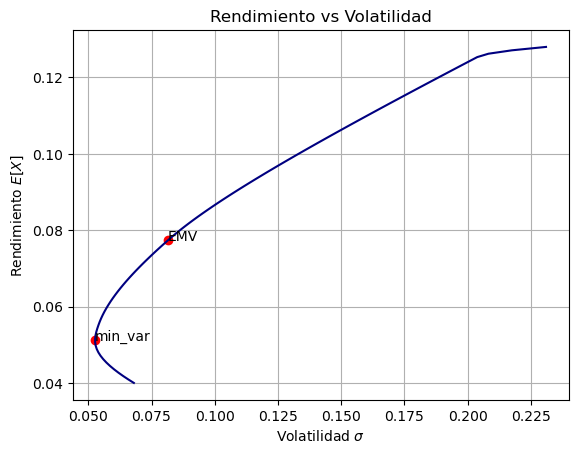

In [17]:
plt.plot(portafolios.vol, portafolios.media, c='navy')

plt.scatter(s_minvar3, e_minvar3, c='red')
plt.text(s_minvar3, e_minvar3, 'min_var')

plt.scatter(max_sharpe.vol, max_sharpe.media, c='red')
plt.text(max_sharpe.vol, max_sharpe.media, 'EMV')

plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

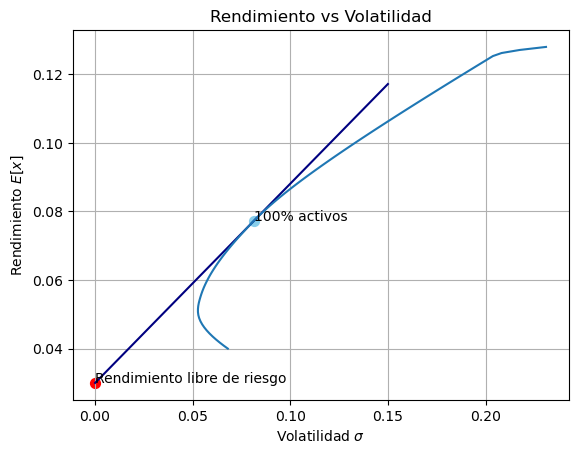

In [18]:
erp = max_sharpe.media.iloc[0]
sp = max_sharpe.vol.iloc[0]

s = np.linspace(0,0.15,10)

lac = 0.03 + s * max_sharpe.sharpe.iloc[0]

plt.scatter(0, 0.03, s = 50, c = 'red')
plt.text(0, 0.03, 'Rendimiento libre de riesgo')

plt.scatter(sp, erp, s = 50, c = 'skyblue')
plt.text(sp, erp, '100% activos')

plt.plot(s, lac, c = 'navy')

plt.plot(portafolios.vol, portafolios.media)

plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.grid()

In [19]:
gamma = np.linspace(1, 10, 10)
df = pd.DataFrame({
    'gamma': gamma,
    'w_activos': (max_sharpe.media.iloc[0] - 0.03)/(gamma*max_sharpe.vol.iloc[0]**2)
})
df['w_libre_riesgo'] = 1-df.w_activos
df['rendimientos'] = df.w_activos * max_sharpe.media.iloc[0] + df.w_libre_riesgo * 0.03
df['volatilidad'] = df.w_activos * max_sharpe.vol.iloc[0]
df['sharpe_ratio'] = (df.rendimientos - 0.03)/df.volatilidad
df

,gamma,w_activos,w_libre_riesgo,rendimientos,volatilidad,sharpe_ratio
0,1.0,7.136147,-6.136147,0.367778,0.581186,0.581186
1,2.0,3.568073,-2.568073,0.198889,0.290593,0.581186
2,3.0,2.378716,-1.378716,0.142593,0.193729,0.581186
3,4.0,1.784037,-0.784037,0.114444,0.145297,0.581186
4,5.0,1.427229,-0.427229,0.097556,0.116237,0.581186
5,6.0,1.189358,-0.189358,0.086296,0.096864,0.581186
6,7.0,1.019450,-0.019450,0.078254,0.083027,0.581186
7,8.0,0.892018,0.107982,0.072222,0.072648,0.581186
8,9.0,0.792905,0.207095,0.067531,0.064576,0.581186
9,10.0,0.713615,0.286385,0.063778,0.058119,0.581186


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

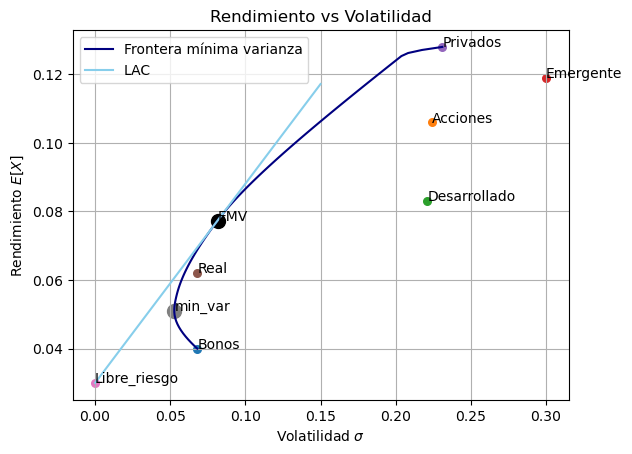

In [20]:
# Activos individuales
activos = annual_ret_summ.keys()
for i in activos:
    plt.scatter(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'], s = 30)
    plt.text(annual_ret_summ[i]['Volatilidad'], annual_ret_summ[i]['Media'], i)

# Mínima varianza
plt.scatter(s_minvar3, e_minvar3, c='gray', s = 100)
plt.text(s_minvar3, e_minvar3, 'min_var')

# EMV
plt.scatter(max_sharpe.vol, max_sharpe.media, c='black', s = 100)
plt.text(max_sharpe.vol, max_sharpe.media, 'EMV')

# Frontera mínima varianza
plt.plot(portafolios.vol, portafolios.media, c='navy', label = 'Frontera mínima varianza')

# LAC
plt.plot(s, lac, c = 'skyblue', label = 'LAC')

plt.legend()
plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[X]$')
plt.grid()

In [21]:
df.query('gamma == 4')

,gamma,w_activos,w_libre_riesgo,rendimientos,volatilidad,sharpe_ratio
3,4.0,1.784037,-0.784037,0.114444,0.145297,0.581186


# Conclusión

De acuerdo a la asignación de capital óptima, un cliente con coeficiente de aversión al riesgo de 4, que es algo bajo, debería invertir el **178.40%** de su capital en los activos, este 78% extra pidiendolo prestado, es decir, apalancarse. 

El -78% de libre de riesgo significa que de ahí se pide prestados, sin embargo, en la práctica no te prestan a tasa libre de riesgo pero ese 78% extra debe pedirse prestado.

Esto le permitiría a este inversionista obtener rendimientos del **11.44%** expuesto a una volatilidad de **14.52%** teniendo así un sharpe ratio de **0.5811.**